In [1]:
# Requirements - uncomment as needed
#!pip install matplotlib numpy scipy phyre

# Generating the dataset

The requirement for the dataset here: 

- only using the template that contains only two balls on the scene;

- red ball must be in the free-fall without any collisions other than with the floor;

## Playground

In [38]:
import matplotlib.pyplot as plt
import numpy as np
import math
import re

import phyre

In [52]:
# Choosing a setup where only one ball is needed
eval_setup = 'ball_cross_template'

# Getting 10 folds of data from the simulator
fold_ids = range(1,11)

# Let's only check the first fold for now
fold_id = 0
train_tasks, dev_tasks, test_tasks = phyre.get_fold(eval_setup, fold_id)
print(f'Size of resulting splits for fold {fold_id}:\n train:', len(train_tasks), '\n dev:',
      len(dev_tasks), '\n test:', len(test_tasks))

Size of resulting splits for fold 0:
 train: 1600 
 dev: 400 
 test: 500


In [42]:
# combining all tasks in one list
tasks = list(train_tasks + dev_tasks + test_tasks)
task_filter = re.compile("00000:*")
tasks = list(filter(task_filter.match, tasks))
tasks

['00000:000',
 '00000:001',
 '00000:002',
 '00000:003',
 '00000:004',
 '00000:005',
 '00000:006',
 '00000:007',
 '00000:008',
 '00000:009',
 '00000:010',
 '00000:011',
 '00000:012',
 '00000:013',
 '00000:014',
 '00000:015',
 '00000:016',
 '00000:017',
 '00000:018',
 '00000:019',
 '00000:020',
 '00000:021',
 '00000:022',
 '00000:023',
 '00000:024',
 '00000:025',
 '00000:026',
 '00000:027',
 '00000:028',
 '00000:029',
 '00000:030',
 '00000:031',
 '00000:032',
 '00000:033',
 '00000:034',
 '00000:035',
 '00000:036',
 '00000:037',
 '00000:038',
 '00000:039',
 '00000:040',
 '00000:041',
 '00000:042',
 '00000:043',
 '00000:044',
 '00000:045',
 '00000:046',
 '00000:047',
 '00000:048',
 '00000:049',
 '00000:050',
 '00000:051',
 '00000:052',
 '00000:053',
 '00000:054',
 '00000:055',
 '00000:056',
 '00000:057',
 '00000:058',
 '00000:059',
 '00000:060',
 '00000:061',
 '00000:062',
 '00000:063',
 '00000:064',
 '00000:065',
 '00000:066',
 '00000:067',
 '00000:068',
 '00000:069',
 '00000:070',
 '0000

In [3]:
# Getting action tier for our tasks - a single ball
action_tier = phyre.eval_setup_to_action_tier(eval_setup)
print('Action tier for', eval_setup, 'is', action_tier)

Action tier for ball_cross_template is ball


In [43]:
# Create the simulator from the tasks and tier.
simulator = phyre.initialize_simulator(tasks, action_tier)

In [28]:
# getting a 1000 actions from a simulator
# it uniformly samples actions skipping invalid ones
# Action dimensions: 3 (x, y, radius)

actions = simulator.build_discrete_action_space(max_actions=1000)

In [30]:
# Temp - TODO to be replaced with a loop
task_index = 0
action = actions[0]

simulation = simulator.simulate_action(task_index, action, need_images=True, need_featurized_objects=True)

Number of observations returned by simulator: 17


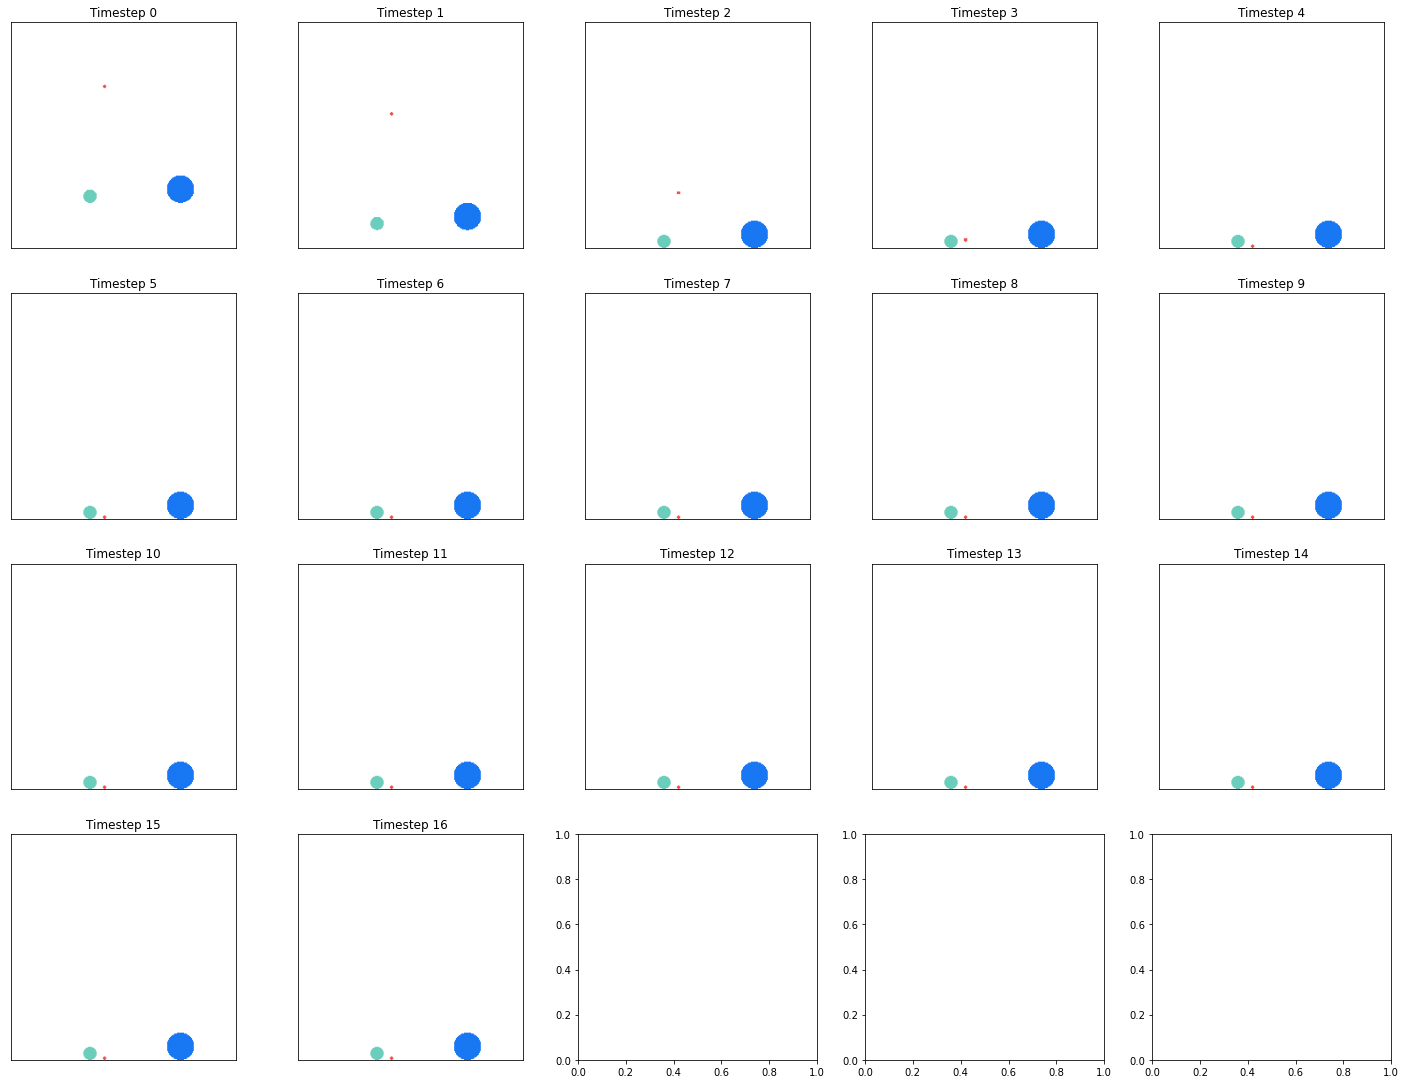

In [31]:
# Displaying the simulation
print('Number of observations returned by simulator:', len(simulation.images))

num_across = 5
height = int(math.ceil(len(simulation.images) / num_across))
fig, axs = plt.subplots(height, num_across, figsize=(20, 15))
fig.tight_layout()
plt.subplots_adjust(hspace=0.2, wspace=0.2)

# We can visualize the simulation at each timestep.
for i, (ax, image) in enumerate(zip(axs.flatten(), simulation.images)):
    # Convert the simulation observation to images.
    img = phyre.observations_to_float_rgb(image)
    ax.imshow(img)
    ax.title.set_text(f'Timestep {i}')
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])

In [32]:
print
print(simulation.featurized_objects.features)

[[[0.35       0.22923309 0.         0.05859375 1.         0.
   0.         0.         0.         1.         0.         0.
   0.         0.        ]
  [0.75       0.26048306 0.         0.12109375 1.         0.
   0.         0.         0.         0.         1.         0.
   0.         0.        ]
  [0.4140625  0.71478    0.         0.015625   1.         0.
   0.         0.         1.         0.         0.         0.
   0.         0.        ]]

 [[0.35       0.10864712 0.         0.05859375 1.         0.
   0.         0.         0.         1.         0.         0.
   0.         0.        ]
  [0.75       0.1398971  0.         0.12109375 1.         0.
   0.         0.         0.         0.         1.         0.
   0.         0.        ]
  [0.4140625  0.594194   0.         0.015625   1.         0.
   0.         0.         1.         0.         0.         0.
   0.         0.        ]]

 [[0.35       0.02942147 0.         0.05859375 1.         0.
   0.         0.         0.         1.         

In [50]:
def is_red_ball_in_free_fall(features):
    return False not in [features[0][-1][0] == features[frame_id][-1][0] for frame_id in range(len(features))]

In [51]:
is_red_ball_in_free_fall(simulation.featurized_objects.features)

True

## Generation

In [70]:
import matplotlib.pyplot as plt
import numpy as np
import math
import re
import itertools

import phyre

In [62]:
# Choosing a setup where only one ball is needed
eval_setup = 'ball_cross_template'


# We only need one fold as we mix all the data together anyway
fold_id = 0

train_tasks, dev_tasks, test_tasks = phyre.get_fold(eval_setup, fold_id)
tasks = list(train_tasks + dev_tasks + test_tasks)

print('Total tasks: ', len(tasks))

Total tasks:  2500


In [63]:
# Filtering tasks to only include a simple two-ball template. The template key: '00000:xxx'

task_filter = re.compile("00000:*")
tasks = list(filter(task_filter.match, tasks))

print('Tasks after filtering: ', len(tasks))

Tasks after filtering:  100


In [64]:
# Getting action tier for our tasks - a single ball
action_tier = phyre.eval_setup_to_action_tier(eval_setup)
print('Action tier for', eval_setup, 'is', action_tier)

Action tier for ball_cross_template is ball


In [65]:
# Create the simulator from the tasks and tier.
simulator = phyre.initialize_simulator(tasks, action_tier)

In [66]:
# getting a 1000 actions from a simulator
# it uniformly samples actions skipping invalid ones
# Action dimensions: 3 (x, y, radius) - represent coordinates and size of the red ball

actions = simulator.build_discrete_action_space(max_actions=1000)

In [73]:
# Defining a function to check if the red ball is in the free fall throughout the simulation
def is_red_ball_in_free_fall(simulation):
    features = simulation.featurized_objects.features
    return False not in [features[0][-1][0] == features[frame_id][-1][0] for frame_id in range(len(features))]

In [80]:
# Getting only the coordinates of the red ball
def get_red_ball_data(simulation):
    features = simulation.featurized_objects.features
    data = []
    for frame_id in range(len(features)):
        data.append([features[frame_id][-1][0], features[frame_id][-1][1]])
    return data

In [85]:
for task_index, action_index in itertools.product(range(len(tasks)), range(len(actions))):
    simulation = simulator.simulate_action(task_index, actions[action_index], need_images=True, need_featurized_objects=True)
    if simulation.status.is_invalid(): continue
    if is_red_ball_in_free_fall(simulation):
        np.save(f'data-free-fall/task-{task_index}-action-{action_index}', get_red_ball_data(simulation))

In [86]:
# DO NOT INCLUDE IT IN THE SCRIPT
# Checking what is in one of the files that I saved
np.load('data-free-fall/task-0-action-0.npy')

array([[0.4140625 , 0.71478   ],
       [0.4140625 , 0.594194  ],
       [0.4140625 , 0.24392076],
       [0.4140625 , 0.03623718],
       [0.4140625 , 0.00793899],
       [0.4140625 , 0.00793899],
       [0.4140625 , 0.00793899],
       [0.4140625 , 0.00793899],
       [0.4140625 , 0.00793899],
       [0.4140625 , 0.00793899],
       [0.4140625 , 0.00793899],
       [0.4140625 , 0.00793899],
       [0.4140625 , 0.00793899],
       [0.4140625 , 0.00793899],
       [0.4140625 , 0.00793899],
       [0.4140625 , 0.00793899],
       [0.4140625 , 0.00793899]], dtype=float32)